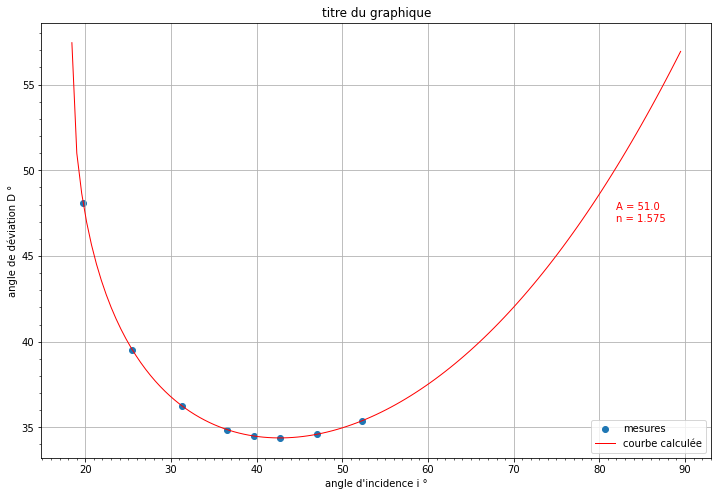

In [5]:
import matplotlib.pyplot as plt
from numpy import *
from matplotlib.ticker import MultipleLocator

# mettre vos valeurs mesurées en  °
x = [19.752,25.498,31.252,36.502,39.752,42.752,47.002,52.252]
y = [48.08,39.509,36.259,34.87,34.482,34.377,34.587,35.368]

# transformation des données en ° en rad
xrad = [valeur_x*pi/180 for valeur_x in x]
yrad = [valeur_y*pi/180 for valeur_y in y]
# print(xrad,yrad)

# Définition du modèle : angle de déviation en fonction de A, n, i en rad
def fonction_modele(xrad, A, n):
    theta1 = xrad                       # angle d'incidence
    theta1prime = arcsin(sin(theta1)/n) # angle de réfraction dans le prisme
    theta2prime = A - theta1prime       # angle dans le prisme face de sortie
    theta2 = arcsin(n*sin(theta2prime)) # angle de réfraction face de sortie
    dev = theta1 + theta2 -A            # angle de déviation en rad
    return dev

# angle du prisme et indice du prisme à modifier
A = 51*pi/180
n = 1.575
# pour écrire sur la courbe
donnee = "A = %.1f \nn = %.3f" % (A*180/pi, n)
#print(donnee)

# calcul des angles de déviations pour la plage des angles d'incidences possible
thetamin = arcsin(n*sin(A-arcsin(1/n)))         # angle d'incidente min en dessous reflexion totale en sortie
#print(thetamin*180/pi)
x_val = list(arange(thetamin, pi/2, 0.01))      # liste d'abscisse pour courbe
x_valdeg = [valeur*180/pi for valeur in x_val]  # transformation rad en °
ycal = fonction_modele(x_val, A,n)              # calcul de ordonnées pour courbe
ycaldeg = [valeur*180/pi for valeur in ycal]    # transformation rad en °

# tracé du graphique
plt.figure(figsize = (12,8))
ax = plt.axes()
# libellé des axes
plt.xlabel("angle d'incidence i °")
plt.ylabel("angle de déviation D °")
# titre du graphique - à changer
plt.title("titre du graphique")
# points de mesure
plt.scatter(x, y, label="mesures")
# courbe calculée
plt.plot(x_valdeg, ycaldeg, color='red', linewidth=1, label="courbe calculée")
# affichage des paramètres A et n de la courbe calculée
plt.text(82,47, donnee, color="red")
# affiche la légende en bas à droite
plt.legend(loc=4)
# affiche la grille
plt.grid(True)
# ajout de graduations fines
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(1))

plt.show()